In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def compare_dist_w_true(type, data, metric, labels):

    data_melted = data.melt(value_vars=[metric, f"{metric}_true"], var_name="Type", value_name="Value")

    if type == 'violin':
        plt.figure(figsize=(6,4))
        sns.violinplot(data=data_melted, x="Type", y="Value", hue='Type', palette="Set2")

    elif type == 'all':
        plt.figure(figsize=(6,4))
    
        # Violin plot
        sns.violinplot(data=data_melted, x="Type", y="Value", hue="Type", inner=None, palette="Set2")
        
        flierprops = dict(marker='o', markerfacecolor='grey', markersize=4, markeredgewidth=0)

        # Boxplot
        sns.boxplot(data=data_melted, x="Type", y="Value", hue="Type", flierprops=flierprops,
                    width=0.15, showcaps=True, boxprops={'facecolor':'none'}, 
                    showfliers=True, whiskerprops={'linewidth':2}, saturation=1, palette="Set2")
        
        # Raw points
        #sns.stripplot(data=data_melted, x="Type", y="Value", hue="Type", palette='dark:k', jitter=True, size=4, alpha=0.5)

    plt.title(labels['title'])
    plt.xlabel(None)
    plt.xticks(ticks=[0, 1], labels=['OMTRA', 'True'])
    plt.ylabel(labels['ylabel'])
    plt.show()
        

def generate_plots(data, plot_mean=False):
    violin_metrics = {'minimizedAffinity': {'title': 'Vina', 'ylabel': 'Vina score (kcal/mol)'},
                      'vina_min': {'title': 'Vina min', 'ylabel': 'Vina min score (kcal/mol)'},
                      'strain': {'title': 'Strain', 'ylabel': 'Strain energy'},
                      'clashes': {'title': 'Clashes', 'ylabel': '# clashes'}}
    
    if plot_mean:
        for metric, labels in violin_metrics.items():
            compare_dist_w_true(type='violin', data=data.groupby('sys_id')[[metric, f"{metric}_true"]].mean(), metric=metric, labels=labels)

    else:
        for metric, labels in violin_metrics.items():
            compare_dist_w_true(type='violin', data=data, metric=metric, labels=labels)


    # vina score system-level comparison
    grouped = data.groupby("sys_id")[["minimizedAffinity", "minimizedAffinity_true"]].mean().reset_index()

    # Sort by ascending vina score
    sorted_sys_ids = grouped.sort_values("minimizedAffinity_true", ascending=False)["sys_id"]

    melted = grouped.melt(id_vars="sys_id", 
                            value_vars=["minimizedAffinity", "minimizedAffinity_true"], 
                            var_name="Type", value_name="Affinity_avg")

    melted["sys_id"] = pd.Categorical(melted["sys_id"], categories=sorted_sys_ids, ordered=True)

    plt.figure(figsize=(11,7))
    sns.lineplot(
        data=melted,
        x="sys_id", y="Affinity_avg", hue='Type', palette='Set2', legend=False
    )
    sns.scatterplot(data=melted, x="sys_id", y="Affinity_avg", hue="Type", s=60, palette='Set2')


    plt.gca().invert_yaxis()

    ticks = plt.gca().get_xticks()
    labels = plt.gca().get_xticklabels()
    for i, label in enumerate(labels):
        if i % 10 != 0:
            label.set_visible(False)

    ax = plt.gca()
    for pos in range(0, len(sorted_sys_ids), 10):
        ax.axvline(x=pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
        
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mean Vina score")
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(6,4))
    if plot_mean:
        data = data.groupby('sys_id')[['rmsd']].mean()
    df = pd.DataFrame({'rmsd': data['rmsd'], 'category': 'OMTRA'})
    sns.violinplot(data=df, x='category', y='rmsd', hue='category', palette='Set2')

    plt.title('RMSD')
    plt.xlabel('')
    plt.ylabel('rmsd')
    plt.show()


def pb_validity_summary(data):
    avg_pb_metrics = {}

    for col in data.columns:
        avg_pb_metrics[col] = data[col].mean()

    sorted_pb_metrics = sorted(avg_pb_metrics.items(), key=lambda item: item[1])

    # Print sorted key-value pairs
    for key, value in sorted_pb_metrics:
        print(f"{key}: {value}")

# 1 Rigid Docking
• Condensed atom typing <br>
• No protein residue encoding

In [199]:
rd_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs/rigid_docking_condensed_metrics_OLD.csv')
rd_metrics

,sys_id,protein_id,gen_ligand_id,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,...,clashes_true,strain_true,HBAcceptor_true,HBDonor_true,PiStacking_true,Hydrophobic_true,rmsd,system_id,ligand_id,ccd
0,sys_0_gt,protein_0,gen_ligands_0,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,2.501236,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
1,sys_0_gt,protein_0,gen_ligands_1,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,2.852201,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
2,sys_0_gt,protein_0,gen_ligands_2,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,1.888986,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
3,sys_0_gt,protein_0,gen_ligands_3,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,1.815042,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
4,sys_0_gt,protein_0,gen_ligands_4,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,2.798700,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,sys_199_gt,protein_0,gen_ligands_95,True,True,True,True,True,True,True,...,18.0,124.365337,0.125000,0.083333,0.0,0.229167,2.218436,3ubm__2__1.D__1.H,1.H,COA
19996,sys_199_gt,protein_0,gen_ligands_96,True,True,True,True,True,True,True,...,18.0,124.365337,0.125000,0.083333,0.0,0.229167,11.991525,3ubm__2__1.D__1.H,1.H,COA
19997,sys_199_gt,protein_0,gen_ligands_97,True,True,True,True,True,True,True,...,18.0,124.365337,0.125000,0.083333,0.0,0.229167,3.200083,3ubm__2__1.D__1.H,1.H,COA
19998,sys_199_gt,protein_0,gen_ligands_98,True,True,True,True,True,True,True,...,18.0,124.365337,0.125000,0.083333,0.0,0.229167,2.828965,3ubm__2__1.D__1.H,1.H,COA


## 1.1 PoseBusters Validity

In [185]:
pb_validity_summary(rd_metrics.iloc[:, 3:31])

pb_valid: 0.0603
rmsd_≤_2å: 0.1868
tetrahedral_chirality: 0.42225
minimum_distance_to_protein: 0.44725
internal_energy: 0.9289
volume_overlap_with_protein: 0.9339
double_bond_stereochemistry: 0.96605
bond_lengths: 0.9668
bond_angles: 0.97065
internal_steric_clash: 0.9796
double_bond_flatness: 0.99285
aromatic_ring_flatness: 0.9963
non-aromatic_ring_non-flatness: 0.9993
mol_pred_loaded: 1.0
mol_true_loaded: 1.0
mol_cond_loaded: 1.0
sanitization: 1.0
inchi_convertible: 1.0
all_atoms_connected: 1.0
molecular_formula: 1.0
molecular_bonds: 1.0
protein-ligand_maximum_distance: 1.0
minimum_distance_to_organic_cofactors: 1.0
minimum_distance_to_inorganic_cofactors: 1.0
minimum_distance_to_waters: 1.0
volume_overlap_with_organic_cofactors: 1.0
volume_overlap_with_inorganic_cofactors: 1.0
volume_overlap_with_waters: 1.0


## 1.2 Plots

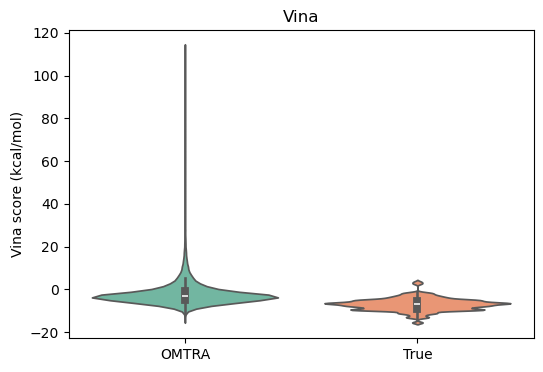

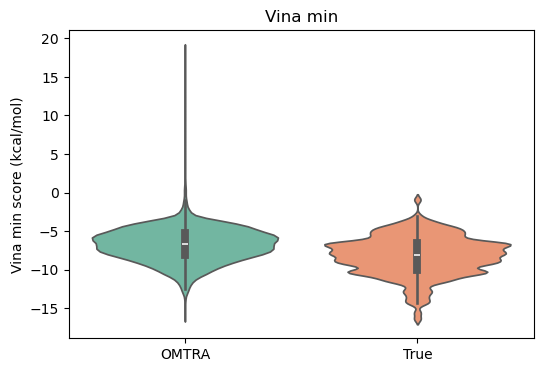

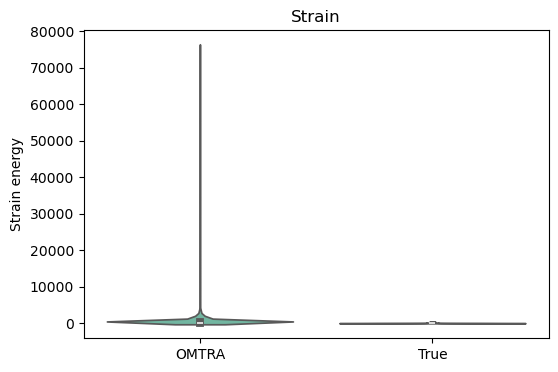

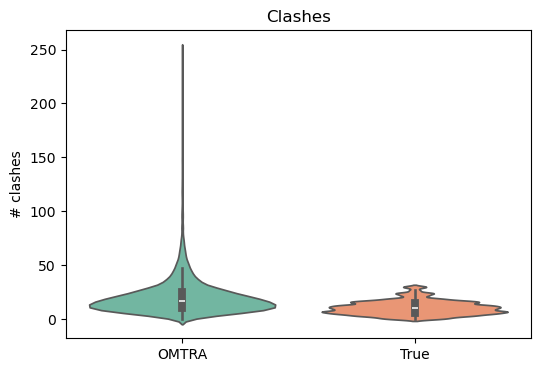

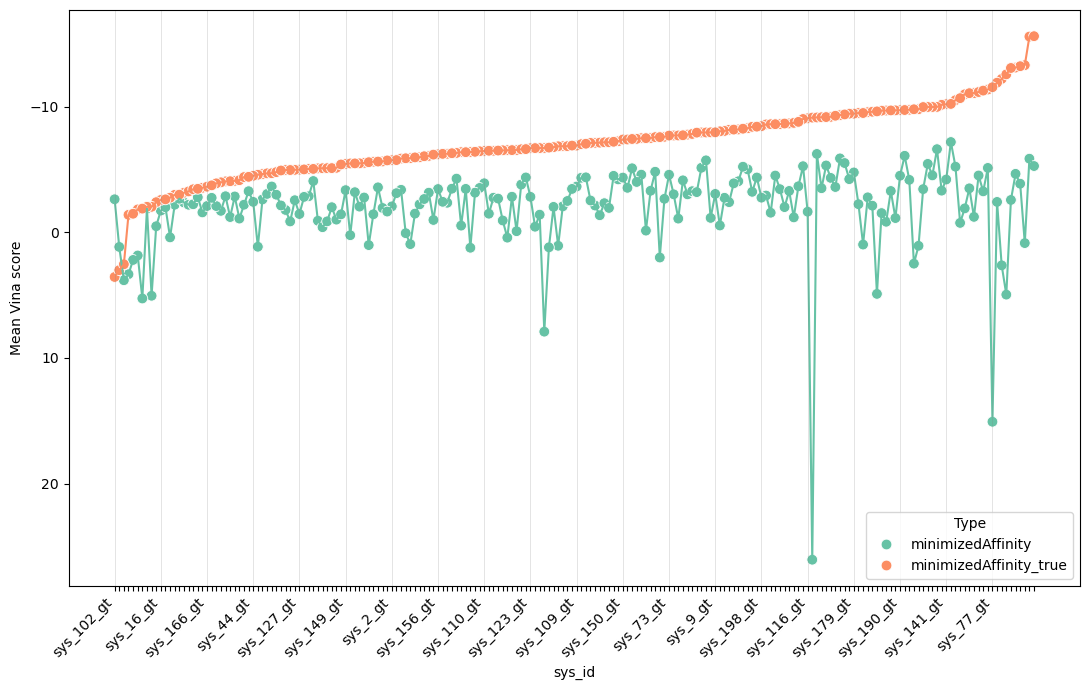

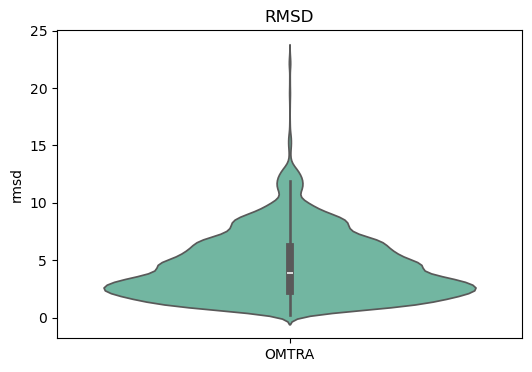

In [ ]:
generate_plots(rd_metrics)

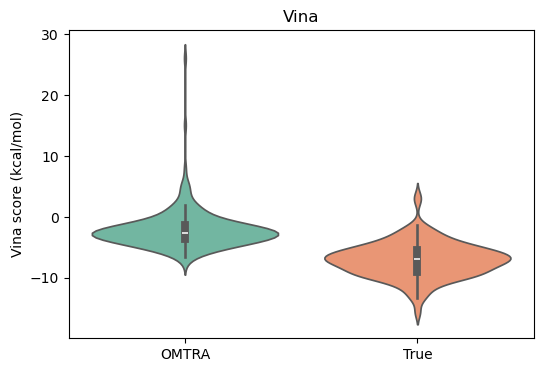

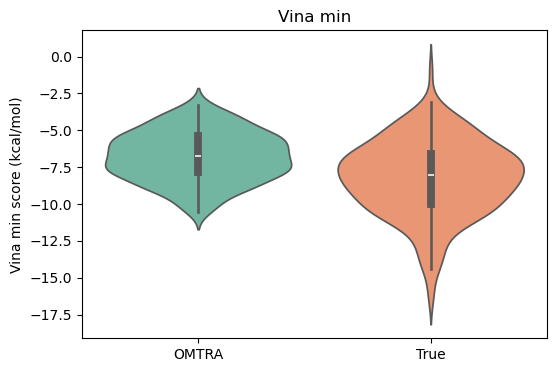

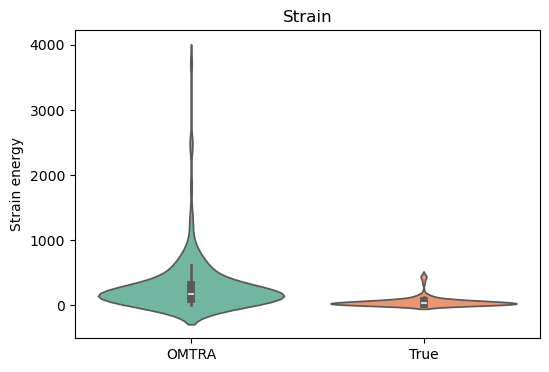

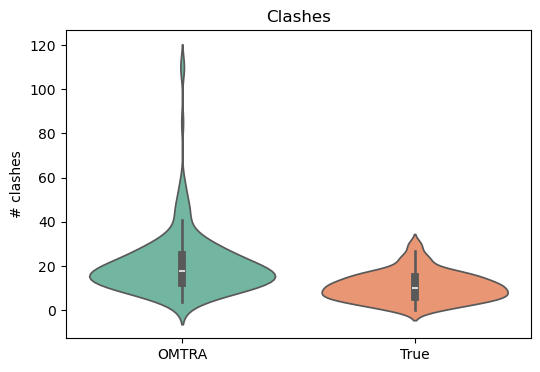

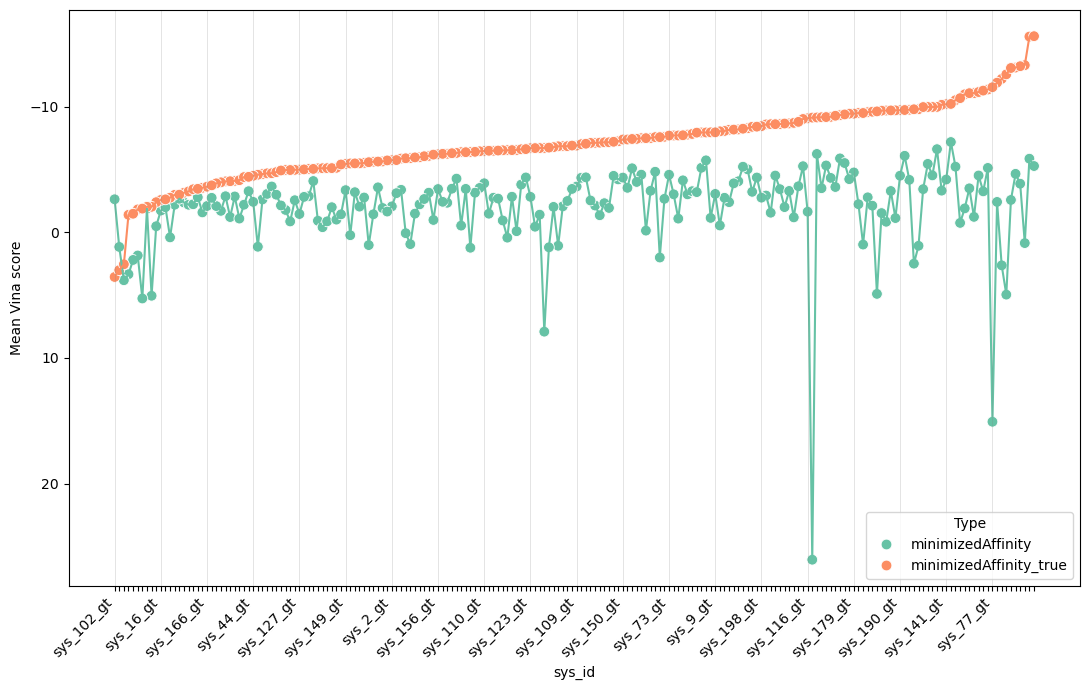

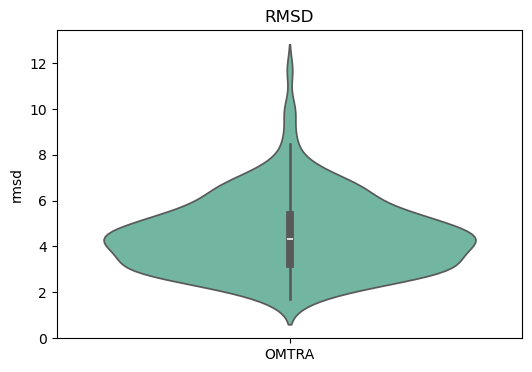

In [205]:
generate_plots(rd_metrics, plot_mean=True)

## 1.3 Summary Tables

In [ ]:
# Table 2 from FLOWR
# 100 samples, 100 replicates

summary_table_1 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score'}

for metric, name in table_metrics.items():
    mean = rd_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().mean()
    std =  rd_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().std()
    summary_table_1.loc['OMTRA', name] = mean.round(3).astype(str) + " ± " + std.round(3).astype(str)

summary_table_1

,PB-valid,Strain,Vina score,Vina min score
OMTRA,0.061 ± 0.082,278.725 ± 415.324,-2.301 ± 2.877,-6.752 ± 1.667


In [ ]:
# Table 2 from DrugFlow

from scipy.stats import wasserstein_distance

summary_table_2 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    summary_table_2.loc['OMTRA', name] = wasserstein_distance(rd_metrics[metric], rd_metrics.groupby('sys_id')[f'{metric}_true'].mean()) 

summary_table_2

,Vina score,Gnina score,H-bond (acc.),H-bond (don.),Hydrophobic
OMTRA,4.964148,0.459639,0.063581,0.038218,0.033835


# 2 Rigid Protein-Conditioned De Novo Design
• Condensed atom typing <br>
• No protein residue encoding

In [ ]:
rdenovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs/fixed_protein_ligand_denovo_condensed_metrics.csv')
rdenovo_metrics

## 2.1 PoseBusters Validity

In [ ]:
pb_validity_summary(rdenovo_metrics.iloc[:, 3:31])

## 2.2 Plots

In [ ]:
generate_plots(rdenovo_metrics)

## 2.3 Summary Tables

In [ ]:
# Table 2 from FLOWR
# 100 samples, 100 replicates

summary_table_1 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score'}

for metric, name in table_metrics.items():
    mean = rdenovo_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().mean()
    std =  rdenovo_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().std()
    summary_table_1.loc['OMTRA', name] = mean.round(3).astype(str) + " ± " + std.round(3).astype(str)

summary_table_1

In [ ]:
# Table 2 from DrugFlow

from scipy.stats import wasserstein_distance

summary_table_2 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    summary_table_2.loc['OMTRA', name] = wasserstein_distance(rdenovo_metrics[metric], rdenovo_metrics.groupby('sys_id')[f'{metric}_true'].mean()) 

summary_table_2

# 3 Flexible Docking
• Condensed atom typing <br>
• No protein residue encoding

In [5]:
fd_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs/flexible_docking_condensed_metrics.csv')
fd_metrics

,sys_id,protein_id,gen_ligand_id,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,inchi_convertible,all_atoms_connected,molecular_formula,...,clashes_true,strain_true,HBAcceptor_true,HBDonor_true,PiStacking_true,Hydrophobic_true,rmsd,system_id,ligand_id,ccd
0,sys_0_gt,gen_prot_0,gen_ligands_0,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,2.216764,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
1,sys_0_gt,gen_prot_1,gen_ligands_1,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,1.523607,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
2,sys_0_gt,gen_prot_2,gen_ligands_2,True,True,True,True,True,True,True,...,8.0,4.088788,0.333333,0.222222,0.0,0.000000,3.631406,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP
3,sys_1_gt,gen_prot_0,gen_ligands_0,True,True,True,True,True,True,True,...,16.0,438.036387,0.161290,0.032258,0.0,0.096774,4.127002,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.K,ATP
4,sys_1_gt,gen_prot_1,gen_ligands_1,True,True,True,True,True,True,True,...,16.0,438.256495,0.161290,0.032258,0.0,0.096774,4.690791,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.K,ATP
5,sys_1_gt,gen_prot_2,gen_ligands_2,True,True,True,True,True,True,True,...,16.0,438.967781,0.161290,0.032258,0.0,0.096774,6.172053,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.K,ATP


## 3.1 PoseBusters Validity

In [6]:
pb_validity_summary(fd_metrics.iloc[:, 3:31])

rmsd_≤_2å: 0.16666666666666666
pb_valid: 0.16666666666666666
minimum_distance_to_protein: 0.5
mol_pred_loaded: 1.0
mol_true_loaded: 1.0
mol_cond_loaded: 1.0
sanitization: 1.0
inchi_convertible: 1.0
all_atoms_connected: 1.0
molecular_formula: 1.0
molecular_bonds: 1.0
double_bond_stereochemistry: 1.0
tetrahedral_chirality: 1.0
bond_lengths: 1.0
bond_angles: 1.0
internal_steric_clash: 1.0
aromatic_ring_flatness: 1.0
non-aromatic_ring_non-flatness: 1.0
double_bond_flatness: 1.0
internal_energy: 1.0
protein-ligand_maximum_distance: 1.0
minimum_distance_to_organic_cofactors: 1.0
minimum_distance_to_inorganic_cofactors: 1.0
minimum_distance_to_waters: 1.0
volume_overlap_with_protein: 1.0
volume_overlap_with_organic_cofactors: 1.0
volume_overlap_with_inorganic_cofactors: 1.0
volume_overlap_with_waters: 1.0


## 3.2 Plots

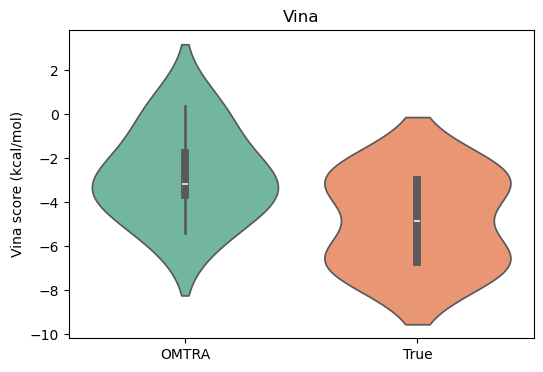

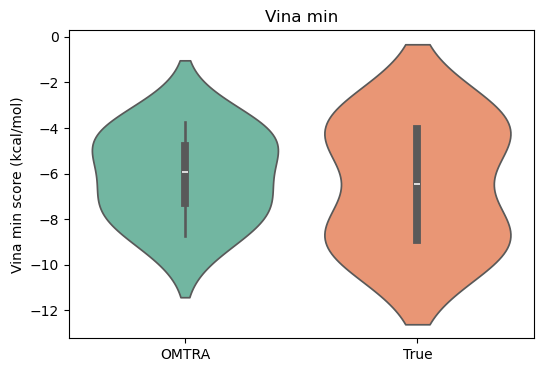

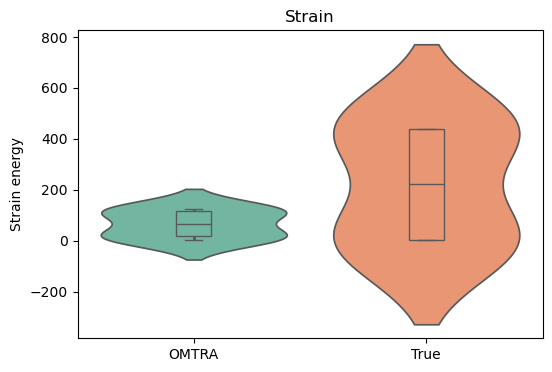

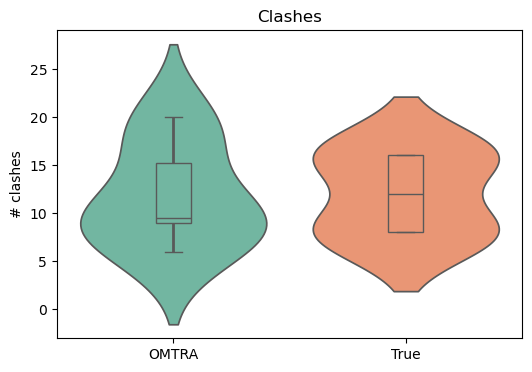

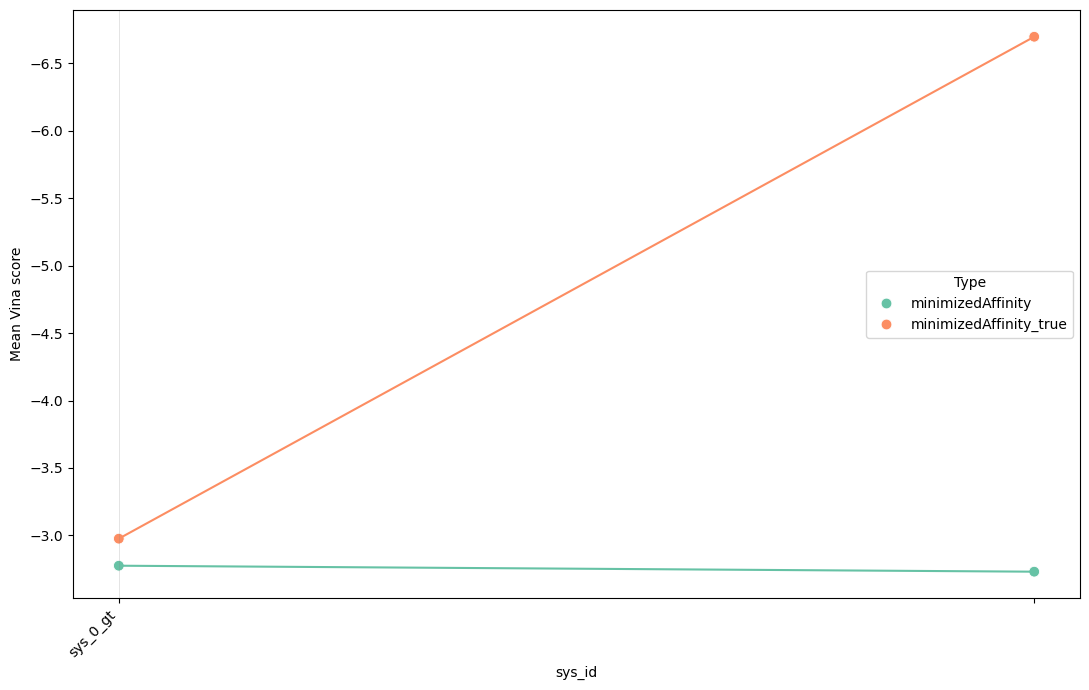

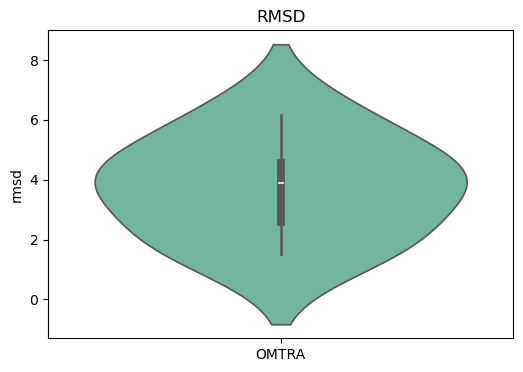

In [193]:
generate_plots(fd_metrics)

## 3.3 Summary Tables

In [189]:
summary_table_1 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score'}

for metric, name in table_metrics.items():
    mean = fd_metrics.groupby('sys_id')[metric].mean().mean()
    std =  fd_metrics.groupby('sys_id')[metric].mean().std()
    summary_table_1.loc['OMTRA', name] = mean.round(3).astype(str) + " ± " + std.round(3).astype(str)

summary_table_1

,PB-valid,Strain,Vina score,Vina min score
OMTRA,0.167 ± 0.236,65.906 ± 70.75,-2.753 ± 0.031,-6.07 ± 2.324


In [190]:
# Table 2 from DrugFlow
from scipy.stats import wasserstein_distance

summary_table_2 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    summary_table_2.loc['OMTRA', name] = wasserstein_distance(fd_metrics[metric], fd_metrics.groupby('sys_id')[f'{metric}_true'].mean()) 

summary_table_2

,Vina score,Gnina score,H-bond (acc.),H-bond (don.),Hydrophobic
OMTRA,2.138985,0.425216,0.13859,0.090203,0.005376


# 4 Flexible Protein-Conditioned De Novo Design
• Condensed atom typing <br>
• No protein residue encoding

In [ ]:
fdenovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs/protein_ligand_denovo_condensed_metrics.csv')
fdenovo_metrics

## 4.1 PoseBusters Validity

In [ ]:
pb_validity_summary(fdenovo_metrics.iloc[:,])

## 4.2 Plots

In [ ]:
generate_plots(fdenovo_metrics)

## 4.3 Summary Tables

In [ ]:
# Table 2 from FLOWR
# 100 samples, 100 replicates

summary_table_1 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score'}

for metric, name in table_metrics.items():
    mean = fdenovo_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().mean()
    std =  fdenovo_metrics.iloc[0:10000,:].groupby('sys_id')[metric].mean().std()
    summary_table_1.loc['OMTRA', name] = mean.round(3).astype(str) + " ± " + std.round(3).astype(str)

summary_table_1

In [ ]:
# Table 2 from DrugFlow

from scipy.stats import wasserstein_distance

summary_table_2 = pd.DataFrame(index=['OMTRA'])
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    summary_table_2.loc['OMTRA', name] = wasserstein_distance(fdenovo_metrics[metric], fdenovo_metrics.groupby('sys_id')[f'{metric}_true'].mean()) 

summary_table_2